In [146]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.datasets import load_iris
i= load_iris()

In [147]:
dir(i)

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

In [148]:
df=pd.DataFrame(i.data,columns=i.feature_names)

In [149]:
df.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [150]:
i.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [151]:
i.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='|S10')

In [152]:
i.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [153]:
df['target']=i.target
df['flower_names']=df.target.apply(lambda x: i.target_names[x])
df.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [154]:
x=df.drop(['target','flower_names'],axis='columns')

In [155]:
y=df.target

In [156]:
from sklearn.model_selection import train_test_split

In [157]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)  

In [158]:
from sklearn.linear_model import LogisticRegression
reg=LogisticRegression(C=1)

In [159]:
reg.fit(x,y)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [160]:
z=reg.predict(x_test)
z

array([1, 0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 2, 2, 0, 1, 0, 0, 1, 2, 2, 0, 2,
       2, 1, 0, 2, 1, 0, 0, 2])

In [161]:
reg.score(x_test,y_test)

1.0

In [162]:
from sklearn.metrics import confusion_matrix

In [163]:
m=confusion_matrix(y_test,z)
m

array([[12,  0,  0],
       [ 0,  8,  0],
       [ 0,  0, 10]], dtype=int64)

Text(33,0.5,'truth')

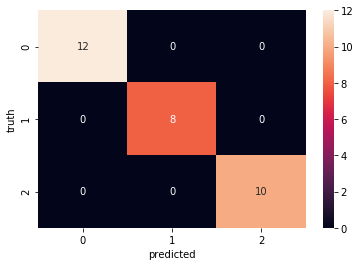

In [164]:
sns.heatmap(m,annot=True)
plt.xlabel('predicted')
plt.ylabel('truth')